In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

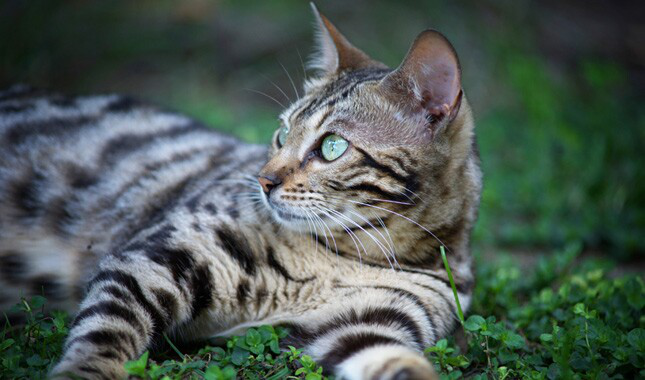

In [ ]:
url = 'https://vetstreet.brightspotcdn.com/dims4/default/3e6557f/2147483647/thumbnail/645x380/quality/90/?url=https%3A%2F%2Fvetstreet-brightspot.s3.amazonaws.com%2F37%2Fc6%2Ffd7e16954968a0d843bab6f1afa6%2FBengal-AP-1RGSFE-645sm3614.jpg' 
image = io.imread(url) 
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
cv2_imshow(image_2 )

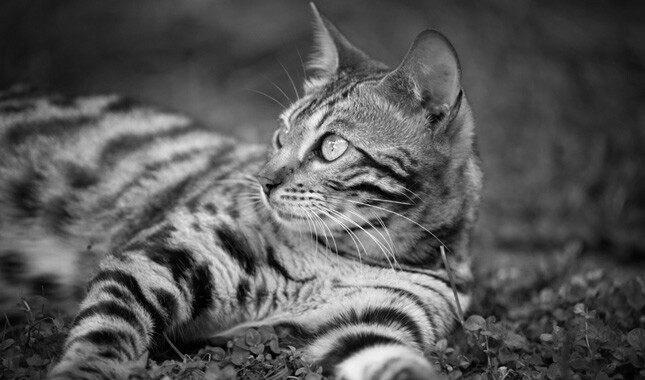

In [ ]:
image_3 = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv2_imshow(image_3)

In [ ]:
b = image_2.copy()
# set green and red channels to 0
b[:, :, 1] = 0
b[:, :, 2] = 0


g = image_2.copy()
# set blue and red channels to 0
g[:, :, 0] = 0
g[:, :, 2] = 0

r = image_2.copy()
# set blue and green channels to 0
r[:, :, 0] = 0
r[:, :, 1] = 0




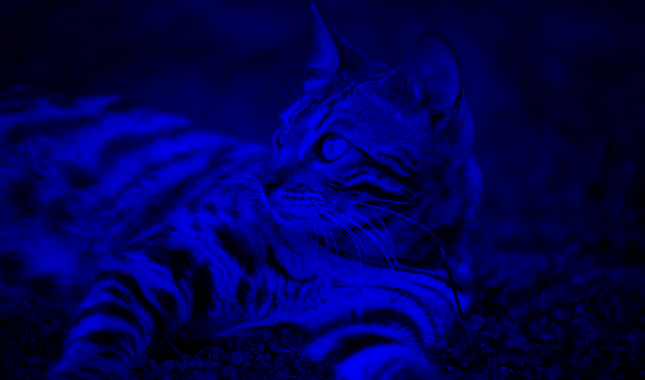

In [ ]:
cv2_imshow(b)

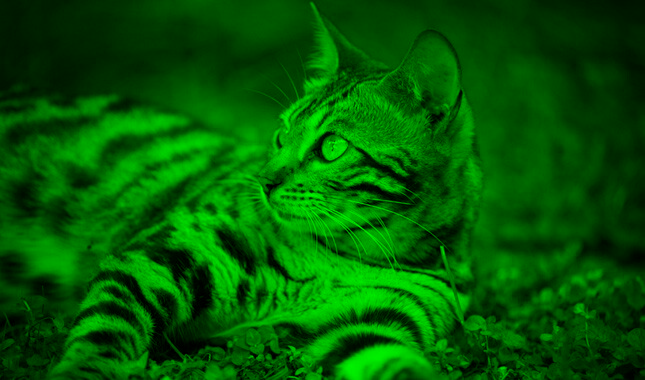

In [ ]:
cv2_imshow(g)



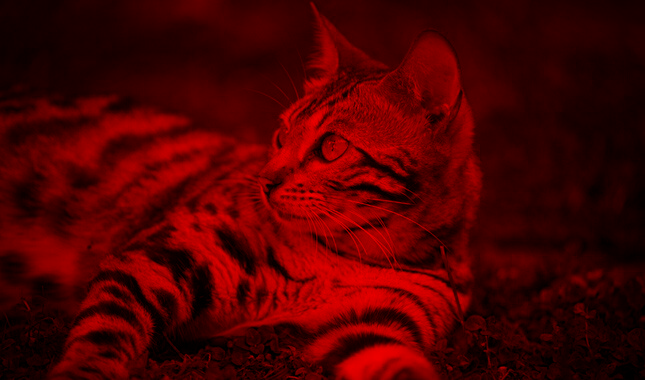

In [ ]:
cv2_imshow(r)

In [ ]:
url = 'https://lh6.googleusercontent.com/8MX914_mpNn_XWPPnbzouQ2gaEBd38q7RdrwXsh_Iop0M3FqOL2yelMcRXdkMU3Z5rx4hnsr3hEEaaBmSliN3roheCmElNjL9QHGGfRaEawXqLTvAl4sKeN4Gp2nLx1UNw=w275'

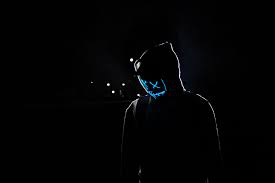

In [ ]:
image = io.imread(url) 
image_4 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
cv2_imshow(image_4)

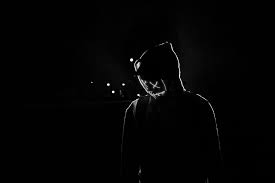

In [ ]:
image_4 = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv2_imshow(image_4)

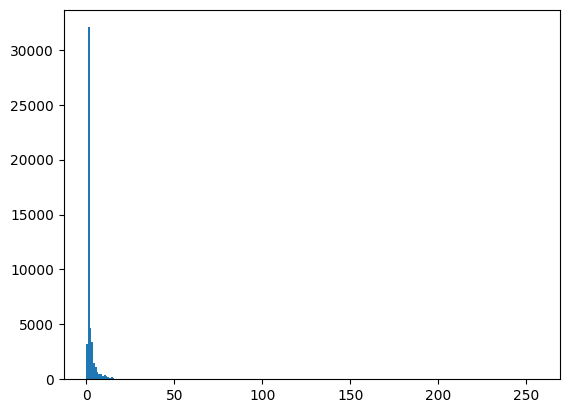

In [ ]:
plt.hist(image_4.ravel(), 256, [0, 256])
plt.show()

In [ ]:
image_4

array([[26, 25, 22, ..., 25, 25, 25],
       [25, 25, 23, ..., 26, 25, 25],
       [25, 26, 25, ..., 27, 26, 25],
       ...,
       [21, 26, 27, ..., 30, 24, 32],
       [22, 26, 26, ..., 29, 24, 30],
       [23, 26, 25, ..., 23, 31, 24]], dtype=uint8)

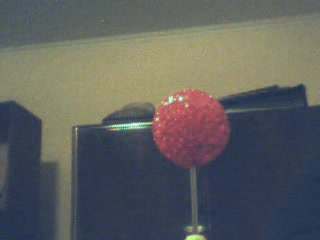

In [ ]:
url = 'http://mechanoid.su/content/cv-base.html/pix/ball2.jpg'
image = io.imread(url) 
image_6 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
cv2_imshow(image_6)

In [ ]:
#autolevels 
def autolevels(img):
  min = np.min(img)
  max = np.max(img)
  new_img = (img - min)/(255/(max-min))
  return new_img

In [ ]:
image_6_auto = autolevels(image_6)


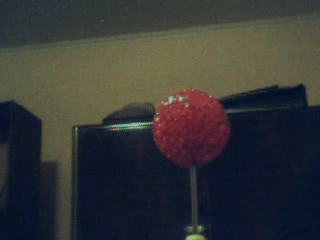

In [ ]:
cv2_imshow(image_6_auto)

In [ ]:
url = '/content/Screen Shot 2022-09-20 at 15.08.15.png'

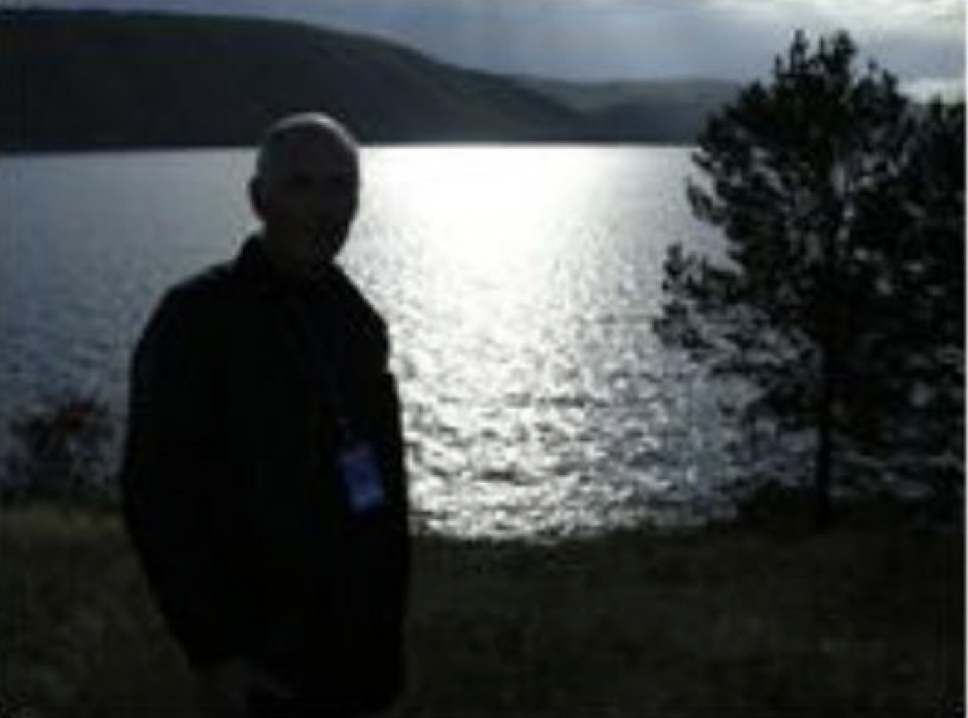

In [ ]:
image = io.imread(url) 
image_6 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
cv2_imshow(image_6)

In [ ]:
image_6_auto = autolevels(image_6)

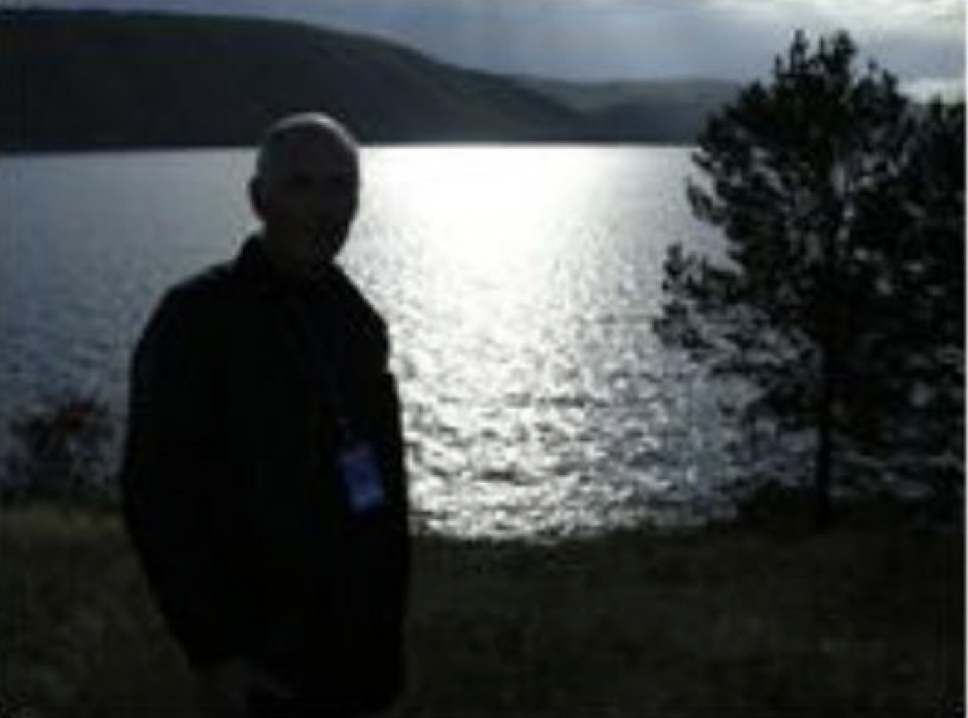

In [ ]:
cv2_imshow(image_6_auto)

In [ ]:
def gamma(img, gamma):
    return (img / 255.0) ** gamma * 255
  

In [ ]:
gamma = gamma(image_6, 0.5)

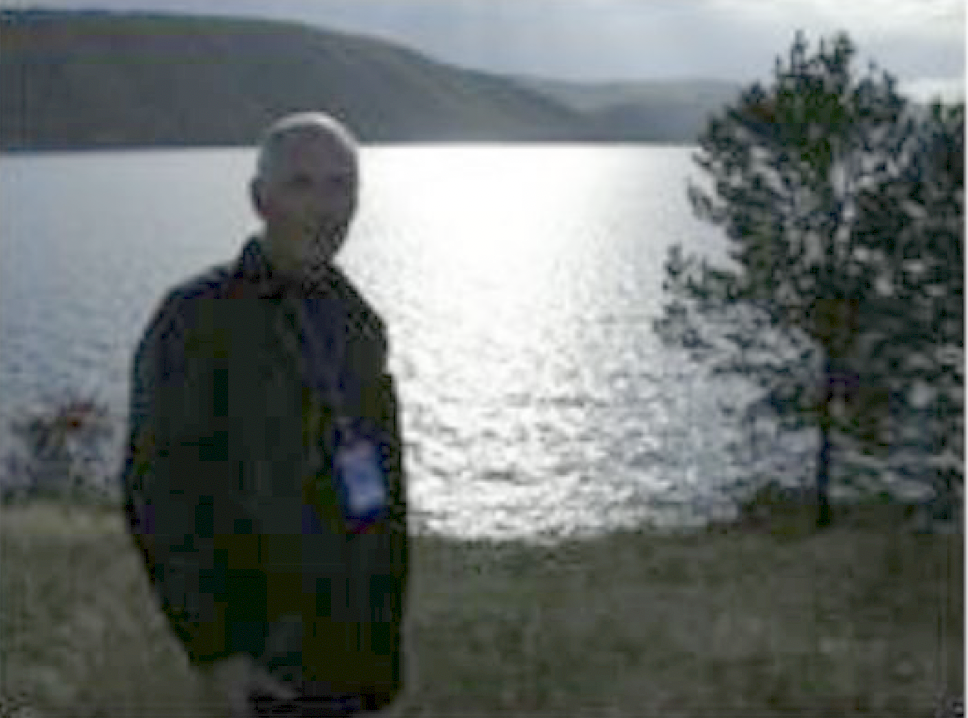

In [ ]:
cv2_imshow(gamma)

In [ ]:
gamma2 = gamma(image_6, 3)

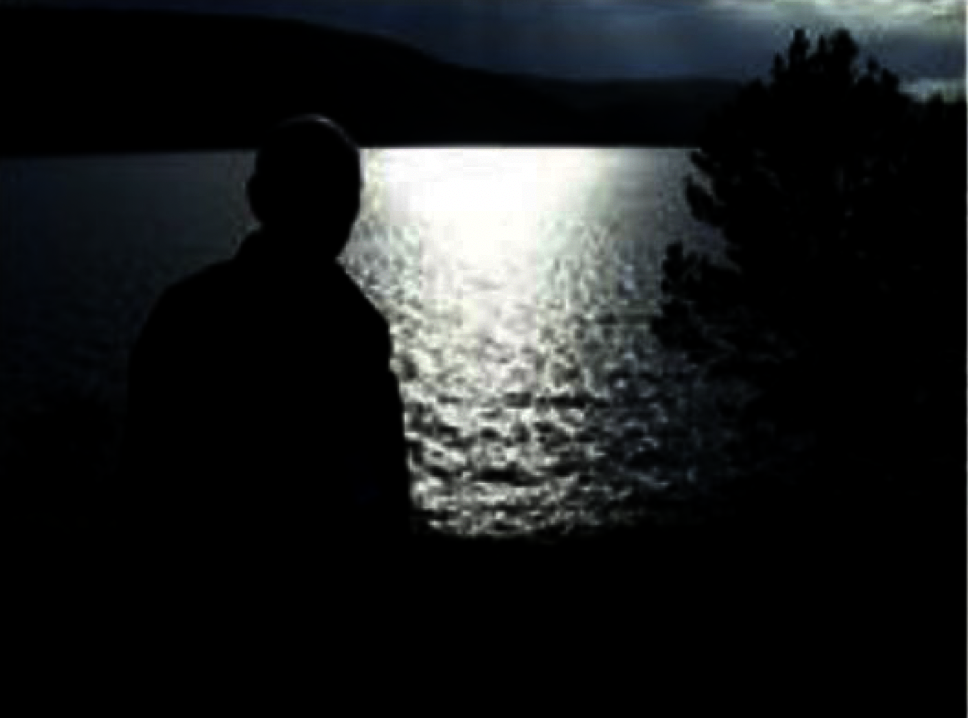

In [ ]:
cv2_imshow(gamma2)

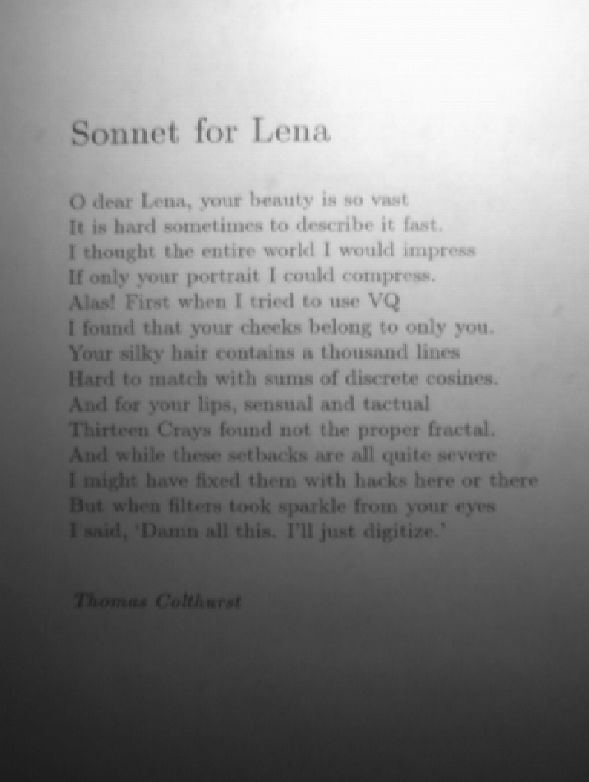

In [ ]:
url = 'https://media.cheggcdn.com/media/3b3/3b3b3f0c-eab5-460b-90c9-5b535545c71f/phptonlj6.png'
image = io.imread(url) 
image_5 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
cv2_imshow(image_5)

In [ ]:
image = cv.cvtColor(image_5, cv.COLOR_BGR2GRAY)

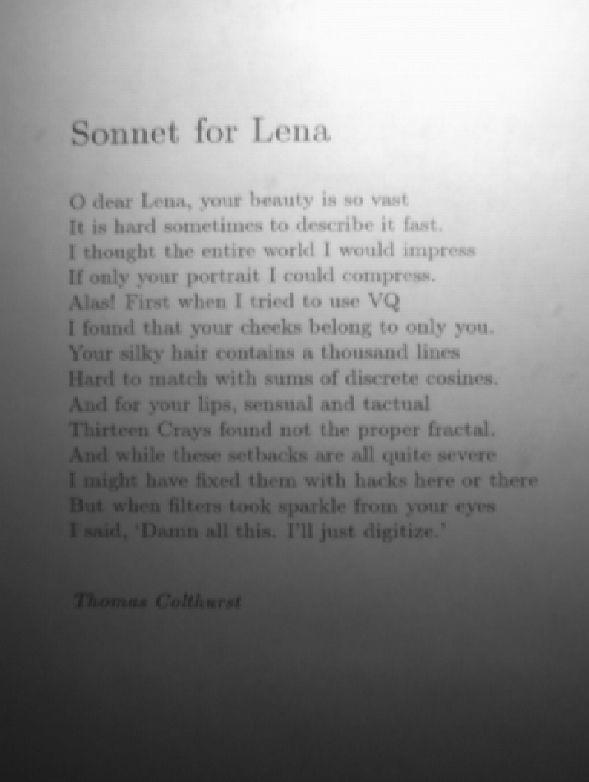

In [ ]:
cv2_imshow(image)

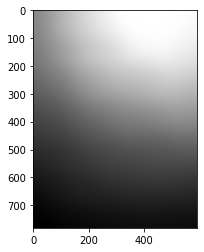

In [ ]:
from scipy import ndimage as flt
flatbook = flt.gaussian_filter(image, sigma = 30)
plt.imshow(flatbook,cmap = "gray")

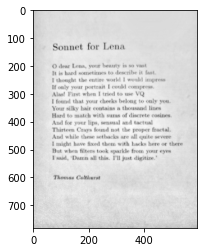

In [ ]:
import numpy as np
res = np.log10(image) - np.log10(flatbook)
minres = np.min(res)
maxres = np.max(res)
res = (res-minres)*255/(maxres-minres)
res = res.astype(int)
plt.imshow(res, cmap='gray')

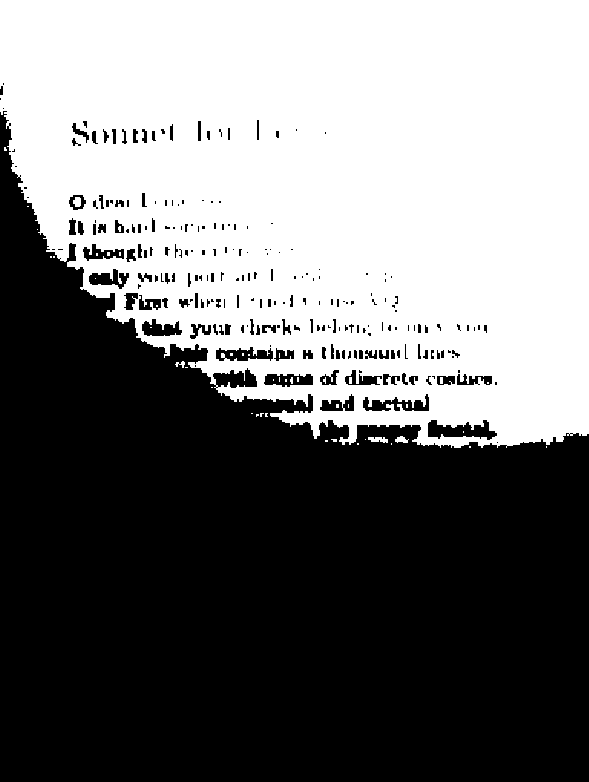

In [ ]:
cv2_imshow((image>np.mean(image))*255)

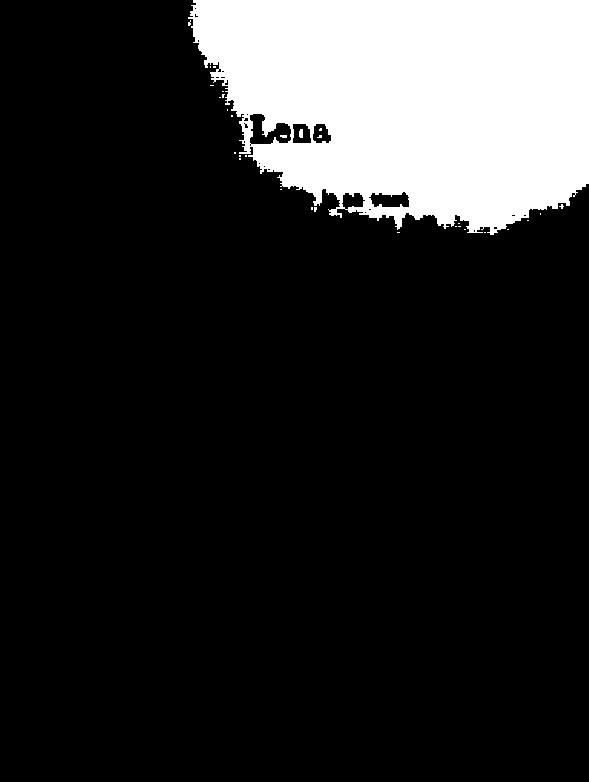

In [ ]:
cv2_imshow((image>np.mean(res))*255)

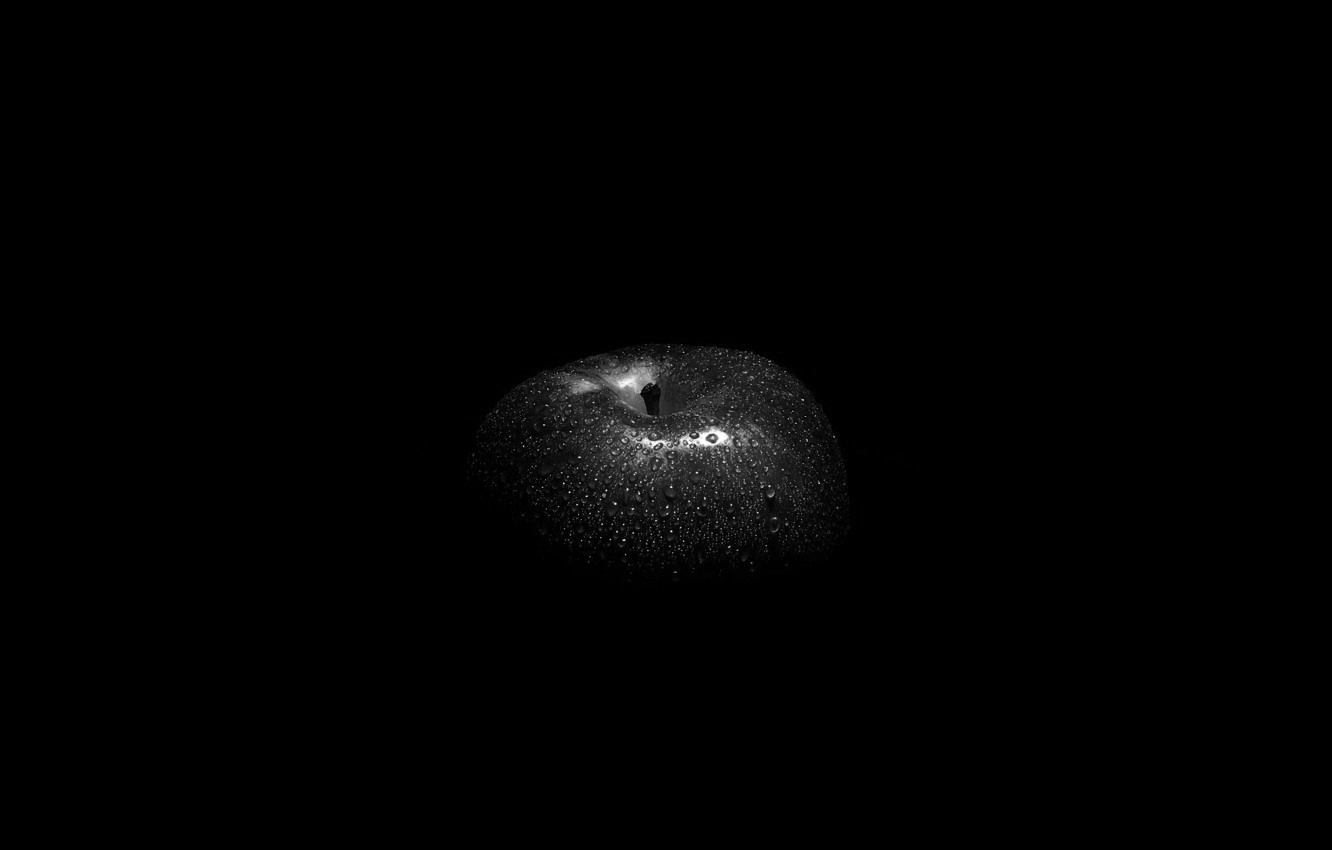

In [ ]:
#to write binarisation code (slide 19) for the next image 
url = 'https://img1.goodfon.com/wallpaper/nbig/b/fa/dark-side-red-apple-fon.jpg'
image = io.imread(url) 
image_5 = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv2_imshow(image_5)

In [ ]:
image_5

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
import random

def get_threshold_value(k, img):
  mylist = [y for x in img for y in x]
  u1 = np.mean(list(x for x in mylist if x > k))
  u2 = np.mean(list(x for x in mylist if x <= k))
  return (u1 + u2) / 2

def binarisation(img, k):
  low = np.min(img)
  high = np.max(img)
  current_threshold = random.randint(low, high)
  T = [get_threshold_value(current_threshold, img)]
  
  while True:
    next_threshold = get_threshold_value(T[-1], img)
    T.append(get_threshold_value(next_threshold, img))
    print(f'current_threshold: {current_threshold}, and next_threshold: {next_threshold}')
    if abs(T[-1] - T[-2]) < k:
      return current_threshold
    current_threshold = next_threshold


current_threshold: 208, and next_threshold: 82.26512149022632
current_threshold: 82.26512149022632, and next_threshold: 56.4914078171722


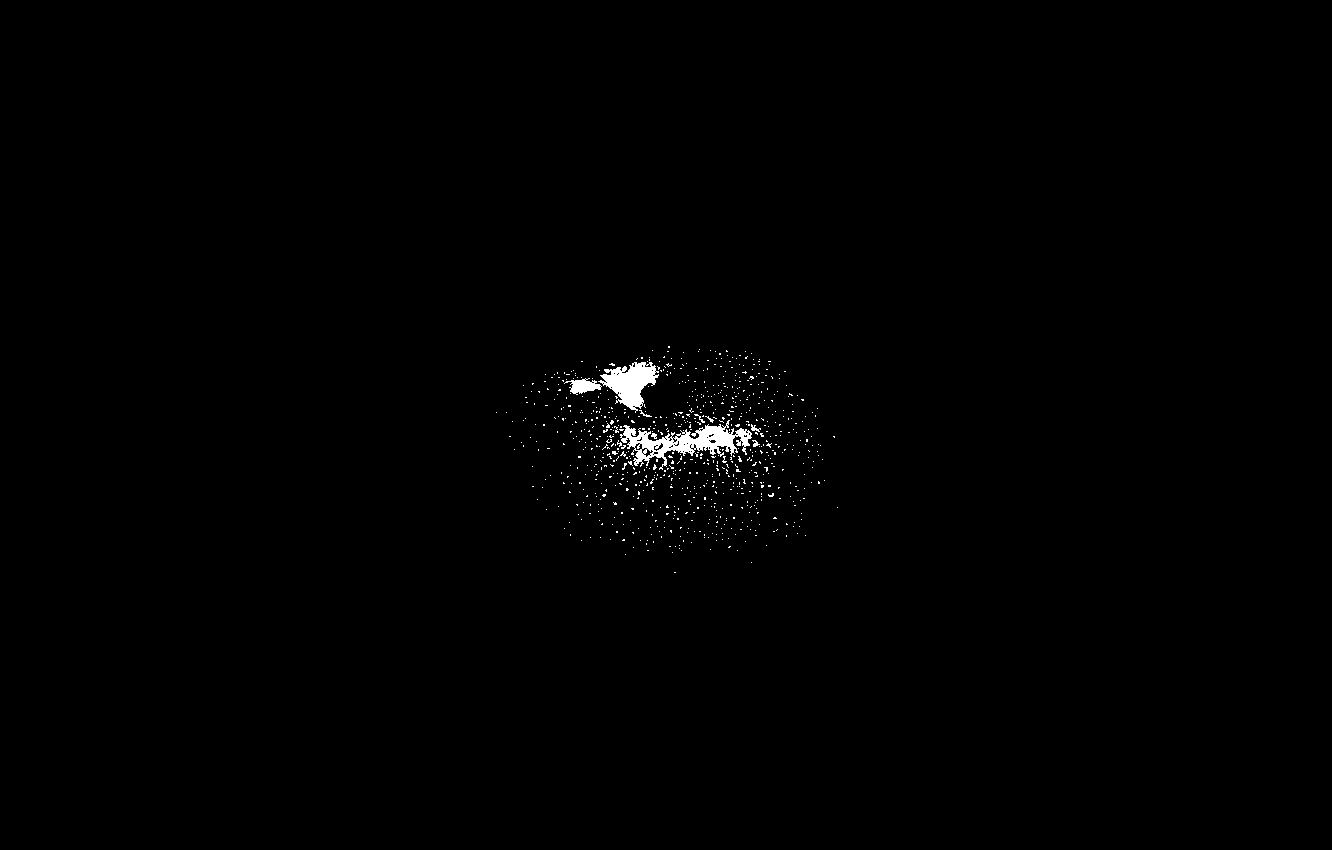

In [ ]:
cv2_imshow((image_5>binarisation(image_5, 40))*255)

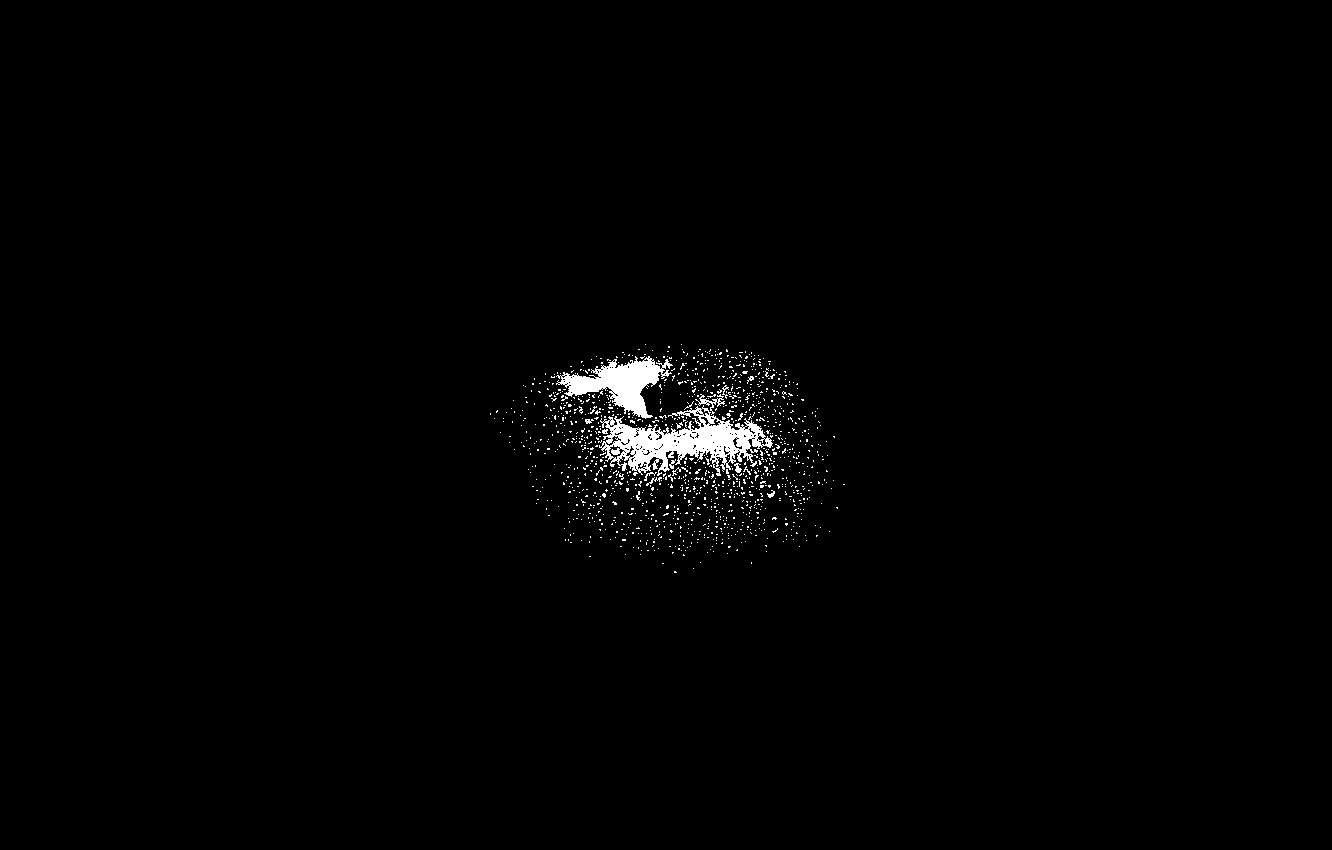

In [ ]:
cv2_imshow((image_5>binarisation(image_5, 10))*255)

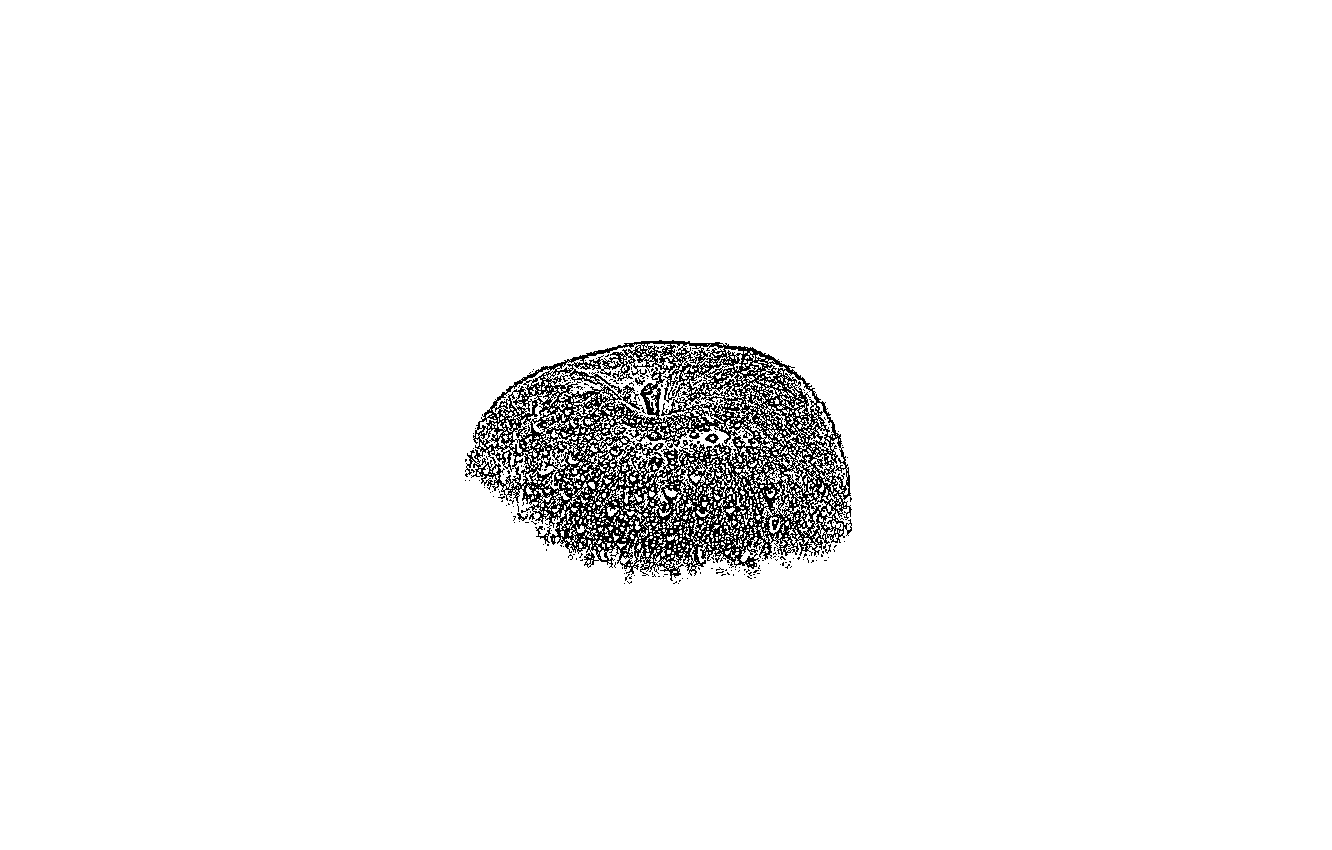

In [ ]:
th3 = cv.adaptiveThreshold(image,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)

cv2_imshow(th3)

In [ ]:
import tensorflow as tf
import tf.nn as nn

for i in nn.Conv2d(in_channels=3, out_channels=8, kernel_size=5).parameters():    
    print(i)

ModuleNotFoundError: ignored